In [1]:
#Library Installations
import sys
!{sys.executable} -m pip install librosa
!{sys.executable} -m pip install music21
!{sys.executable} -m pip install torch-yin

In [2]:
#Testing the bestTimeSignature Function from music21
#Takes a stream of beat values and attempts to predict the closest musical Time Signature
import librosa
import music21

def infer_time_signature(audio_file):
  
    #Load input file
    y, sr = librosa.load(audio_file)
    
    #Determine Onset Envelope, Beat Indicies, and Beat Times
    onset_env = librosa.onset.onset_strength(y=y, sr=sr)
    tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr, onset_envelope=onset_env)
    beat_times = librosa.frames_to_time(beat_frames, sr=sr)
    
    stream = music21.stream.Stream()
    for beat_time in beat_times:
        stream.append(music21.note.Note(beat_time))  
    
    ts = music21.meter.bestTimeSignature(stream)
    
    return ts

In [19]:
#Testing infer_time_signature
audio_file = "C:\\Users\\han1b\\MATLAB Drive\\Published\\EECS 351\\351 project\\Ode-to-joy-melody-piano.mp3"  
time_signature = infer_time_signature(audio_file)
print("Inferred time signature:", time_signature)
print("Correct time signature:", '4/4')

Inferred time signature: <music21.meter.TimeSignature 94/4>
Correct time signature: 4/4


In [7]:
import librosa

audio_file = librosa.load("C:\\Users\\han1b\\MATLAB Drive\\Published\\EECS 351\\351 project\\Ode-to-joy-melody-piano.mp3")
y, sr = audio_file

tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
#print('Estimated tempo: {:.2f} beats per minute'.format(tempo))

beat_times = librosa.frames_to_time(beat_frames, sr=sr)
beat_times

array([ 0.16253968,  0.74303855,  1.30031746,  1.85759637,  2.41487528,
        2.9721542 ,  3.52943311,  4.06349206,  4.64399093,  5.17804989,
        5.7353288 ,  6.29260771,  6.84988662,  7.40716553,  7.96444444,
        8.52172336,  9.07900227,  9.63628118, 10.19356009, 10.72761905,
       11.28489796, 11.84217687, 12.39945578, 12.95673469, 13.51401361,
       14.07129252, 14.62857143, 15.18585034, 15.74312925, 16.30040816,
       16.85768707, 17.39174603, 17.94902494, 18.52952381, 19.06358277,
       19.62086168, 20.17814059, 20.7354195 , 21.29269841, 21.84997732,
       22.40725624, 22.96453515, 23.52181406, 24.07909297, 24.63637188,
       25.19365079, 25.75092971, 26.30820862, 26.84226757, 27.39954649,
       27.9568254 , 28.51410431, 29.07138322, 29.62866213, 30.18594104,
       30.74321995, 31.30049887, 31.85777778, 32.41505669, 32.9723356 ,
       33.52961451, 34.06367347, 34.62095238, 35.17823129, 35.7355102 ,
       36.29278912, 36.85006803, 37.40734694, 37.96462585, 38.52

Estimated tempo: 107.67 beats per minute


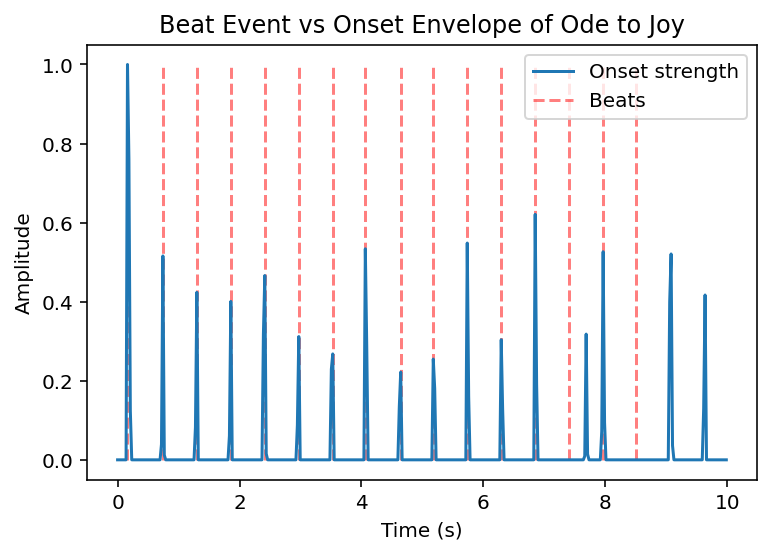

In [20]:
#Onset and Beat Plot for First 10 Seconds of Ode to Joy
import librosa
import matplotlib.pyplot as plt
import numpy as np

#Read in the audio file
audio_file = "C:\\Users\\han1b\\MATLAB Drive\\Published\\EECS 351\\351 project\\Ode-to-joy-melody-piano.mp3"
y, sr = librosa.load(audio_file, duration=10)

#Create an onset strength envelope
onset_env = librosa.onset.onset_strength(y=y, sr=sr, aggregate=np.median)

#Determine Beat Indicies
tempo, beats = librosa.beat.beat_track(onset_envelope=onset_env, sr=sr)
print('Estimated tempo: {:.2f} beats per minute'.format(tempo))

#Determine Beat Times
hop_length = 512
times = librosa.times_like(onset_env, sr=sr, hop_length=hop_length)

#Plot Onsets and Beats
plt.plot(times, librosa.util.normalize(onset_env), label='Onset strength')
plt.vlines(times[beats], 0, 1, alpha=0.5, color='r', linestyle='--', label='Beats')
plt.title("Beat Event vs Onset Envelope of Ode to Joy")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()


[0.16253968 0.71981859 1.27709751 1.83437642 2.39165533 2.94893424
 3.50621315 4.06349206 4.62077098 5.17804989 5.7353288  6.29260771
 6.84988662 7.66258503 7.94122449 9.05578231 9.61306122]


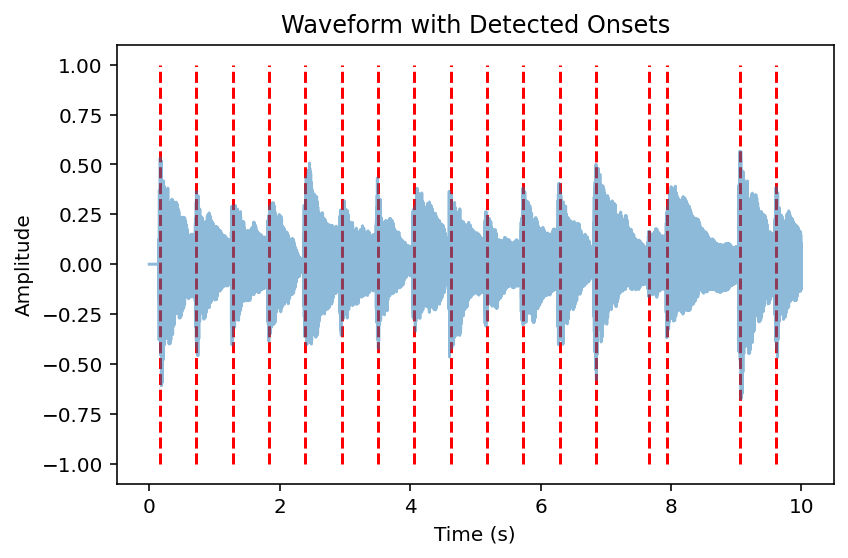

[0.16253968 0.71981859]
[tensor([ 73.9933,  73.9933,  73.9933,  73.9933,  73.9933,  73.9933,  73.9933,
         73.9933,  73.9933,  73.9933,  73.9933,  73.9933,  73.9933,  73.9933,
         73.9933,  73.9933,  73.9933,  73.9933,  73.9933,  73.9933,  73.9933,
         73.9933,  73.9933,  73.9933,  73.9933,  73.9933,  73.9933,  73.9933,
         73.9933,  73.9933,  73.9933,  73.9933,  73.9933,  73.9933,  73.9933,
         73.7458,  73.7458,  73.7458,  73.7458,  73.7458,  73.7458,  73.7458,
        147.0000, 147.0000, 147.0000,  73.7458]), tensor([74.2424, 74.2424, 74.2424, 74.2424, 74.2424, 74.2424, 74.2424, 74.2424,
        74.2424, 74.2424, 74.2424, 74.2424, 74.2424, 74.2424, 74.2424, 74.2424,
        74.2424, 74.2424, 74.2424, 74.2424, 74.2424, 74.2424, 74.2424, 73.9933,
        73.9933, 73.9933, 73.9933, 73.9933, 73.9933, 73.9933, 73.9933, 73.9933,
        73.9933, 73.9933, 73.9933, 73.9933, 73.9933, 73.9933, 73.9933, 73.9933,
        73.9933, 73.9933, 73.9933, 73.9933, 73.9933,  0.0

In [6]:
#Onset Plot for First 10 Seconds of Ode to Joy
import librosa

#Load Audio File
audio_file = "C:\\Users\\han1b\\MATLAB Drive\\Published\\EECS 351\\351 project\\Ode-to-joy-melody-piano.mp3"
y, sr = librosa.load(audio_file, duration=10)

#Determine Onset Times
onset_times = librosa.onset.onset_detect(y=y, sr=sr, units='time')

#Plote Onset Times with Input Signal
plt.plot(np.arange(len(y)) / sr, y, alpha=0.5)
plt.vlines(onset_times, -1, 1, color='r', linestyle='--')
plt.title('Waveform with Detected Onsets of Ode to Joy')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

In [23]:
#Using the YIN pitch detection algorithm along with the onsets to determine frequency of each note transient
#Above plot can be used as reference for this code
import torch
import torchyin
import librosa

#Load Audio File
audio_file = "C:\\Users\\han1b\\MATLAB Drive\\Published\\EECS 351\\351 project\\Ode-to-joy-melody-piano.mp3"
y, sr = librosa.load(audio_file, duration=10)

#Determine Onset Times
onset_times = librosa.onset.onset_detect(y=y, sr=sr, units='time')

pitch_estimates = []

# Iterate over onset times
for i in range(len(onset_times)-1):
    # Calculate window start and end indices based on onset times
    window_start = int(onset_times[i] * sr)  
    window_end = int(onset_times[i+1] * sr)  

    # Apply window function to the segment of the signal
    windowed_signal = y[window_start:window_end]

    # Estimate pitch for the windowed segment
    pitch = torchyin.estimate(windowed_signal, sample_rate=sr)
    
    # Append pitch estimate to the list
    pitch_estimates.append(pitch)

print(pitch_estimates)

#Does not produce desired result
#Expecting an array with size equal to the number of onset windows
#Instead the output is much larger in size with innacurate frequency values

[0.16253968 0.71981859]
[tensor([ 73.9933,  73.9933,  73.9933,  73.9933,  73.9933,  73.9933,  73.9933,
         73.9933,  73.9933,  73.9933,  73.9933,  73.9933,  73.9933,  73.9933,
         73.9933,  73.9933,  73.9933,  73.9933,  73.9933,  73.9933,  73.9933,
         73.9933,  73.9933,  73.9933,  73.9933,  73.9933,  73.9933,  73.9933,
         73.9933,  73.9933,  73.9933,  73.9933,  73.9933,  73.9933,  73.9933,
         73.7458,  73.7458,  73.7458,  73.7458,  73.7458,  73.7458,  73.7458,
        147.0000, 147.0000, 147.0000,  73.7458]), tensor([74.2424, 74.2424, 74.2424, 74.2424, 74.2424, 74.2424, 74.2424, 74.2424,
        74.2424, 74.2424, 74.2424, 74.2424, 74.2424, 74.2424, 74.2424, 74.2424,
        74.2424, 74.2424, 74.2424, 74.2424, 74.2424, 74.2424, 74.2424, 73.9933,
        73.9933, 73.9933, 73.9933, 73.9933, 73.9933, 73.9933, 73.9933, 73.9933,
        73.9933, 73.9933, 73.9933, 73.9933, 73.9933, 73.9933, 73.9933, 73.9933,
        73.9933, 73.9933, 73.9933, 73.9933, 73.9933,  0.0